# Gridhunter Data Plots

In [25]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter

import chart_studio.plotly as py
import plotly.figure_factory as ff

%matplotlib inline

sns.set()

### Helper Functions

In [27]:
# Get DataFrame from csv files
def df_data(algo, epoch, batch_size, lr):
    fname = algo + "-gridhunter-0_epochs" + str(epoch) + "_batch_size" + str(batch_size) + "_lr" + str(lr) + "_.csv"
    file_name = "C:/Users/drago/OneDrive - UW/Ratliff Research/gridhunter_data/"+ fname
    simple_data = pd.read_csv(file_name)
    return simple_data

# Find mode when converging returns, and return x,y coord
def converge_find(data):
    y = Counter(data).most_common(1)[0][0]
    for i in np.arange(0,len(data)):
        ytest = data[i]
        if (y == ytest):
            x = i
            break
    return x,y

# Plot all of one datatype onto one graph
def all_data_plot(algo, epochs, batch_sizes, lrs, studies):
    fig, ax = plt.subplots()
    for epoch in epochs:
        for batch in batch_sizes:
            for lr in lrs:
                for study in studies:
                    data_plot(ax, algo, epoch, batch, lr, study)
                    
# Given what is graphed return an appropriate xlabel (for now only epoch?)
def get_xlabel():
    xlabel = 'Epochs'
    return xlabel

# Given what is graphed return an appropriate ylabel
def get_ylabel(y_df):
    columns = y_df.columns
    if ('avg_rets' in y_df.columns[0]):
        ylabel = 'Average Returns'
    elif ('loss' in y_df.columns[0]):
        ylabel = 'Loss'
    elif ('grad_norms' in y_df.columns[0]):
        ylabel = 'Gradient Norms'
    else:
        ylabel = 'Not Found'
    return ylabel

# Given what is graphed return an appropriate title
def get_title(y_df, algo, epoch, batch_size, lr):
    title = algo + ' agent0 vs agent1 ' + get_ylabel(y_df) + ' (ep =' + str(epoch) + ' bs = ' + str(batch_size) + ' lr = ' + str(lr) + ')'
    return title
    
# Given the arrays of possible epochs, batch_sizes, lr, studies, return a map of all data
def all_data_map_plot(algos, epochs, batchs_sizes, lrs, studies):
    fig, ax = plt.subplots(2,2) # 2 Algos, 2 Studies (Returns + Losses)
    algo_count = -1
    study_count = -1
    for algo in algos:
        algo_count +=1
        if (study_count == 1):
            study_count = -1
        for study in studies:
            study_count += 1
            for epoch in epochs:
                for batch in batch_sizes:
                    for lr in lrs:
                        data_plot(ax[algo_count,study_count], algo, epoch, batch, lr, study, title= algo + ' ' + study)
# Given string list of gradient norms, return float list of grad_norms and RSS for grads         
def grad_norms_to_float(grad_array):
    grad_array = grad_array.strip('][').split(', ')
    for i in np.arange(0,len(grad_array)):
        grad_array[i] = float(grad_array[i])
    root_sum_square = np.sqrt(sum([i**2 for i in grad_array]))
    return grad_array, root_sum_square

### Main Plotting Function

In [41]:
# Given parameters plot graph
def data_plot(fig, ax, algo, epoch, batch_size, lr, data,  title='ABC', conv_label=False, figsize=[9,4]):
    simple_data = df_data(algo, epoch, batch_size, lr)
    
    # Plot
    if ('returns' in data):
        data1 = 'agent0_avg_rets'
        data2 = 'agent1_avg_rets'
    elif ('loss' in data):
        data1 = 'agent0_loss'
        data2 = 'agent1_loss'
    y_df = simple_data[[data1, data2]]
    y = df.to_numpy(y_df)
    x = np.arange(0,len(y))
    fig.set_size_inches(figsize)
    ax.plot(x, y[:,0], color='r')
    ax.plot(x, y[:,1], color='b')
    
# Plot convergence location + label
    if (conv_label):
        x_mode1, y_mode1 = converge_find(y[:,0])
        x_mode2, y_mode2 = converge_find(y[:,1])
        if (x_mode1 !=0):
            ax.plot(x_mode1, y_mode1, 'go')
            ax.text(x_mode1 + 8, y_mode2 + 10, 'x = '+ str(x_mode1) + ' y = '
                     + str(round(y_mode1)), horizontalalignment='center',
                     backgroundcolor=(1,1,1,0.7))
        if (x_mode2 != 0):
            ax.plot(x_mode2, y_mode2, 'go')
            ax.text(x_mode2 + 5, y_mode2 - 7, 'x = '+ str(x_mode2) + ' y = '
                     + str(round(y_mode2)), horizontalalignment='center',
                     backgroundcolor=(1,1,1,0.7))

    ax.set_xlim([0, epoch])
    ax.set_xlabel(get_xlabel())
    ax.set_ylabel(get_ylabel(y_df))
    if ('ABC' not in title):
        ax.set_title(title)
    else:
        ax.set_title(get_title(y_df, algo, epoch, batch_size, lr))
    ax.legend(['Agent 0', 'Agent 1'])
    return 0

### Extra Plotting Functions

In [51]:
# Plot all of one datatype onto one graph
def all_data_plot(algo, epochs, batch_sizes, lrs, studies, figsize=[9,4]):
    fig, ax = plt.subplots()
    for epoch in epochs:
        for batch in batch_sizes:
            for lr in lrs:
                for study in studies:
                    data_plot(fig, ax, algo, epoch, batch, lr, study, figsize=figsize)

# Given the arrays of possible epochs, batch_sizes, lr, studies, return a map of all data
def all_data_map_plot(algos, epochs, batchs_sizes, lrs, studies, figsize=[9,4]):
    fig, ax = plt.subplots(2, 2, figsize=figsize, constrained_layout=True) # 2 Algos, 2 Studies (Returns + Losses)
    algo_count = -1
    study_count = -1
    for algo in algos:
        algo_count +=1
        if (study_count == 1):
            study_count = -1
        for study in studies:
            study_count += 1
            for epoch in epochs:
                for batch in batch_sizes:
                    for lr in lrs:
                        data_plot(fig, ax[algo_count,study_count], algo, epoch, batch, lr, study, title= algo + ' ' + study, figsize=figsize)


### Graphs

0

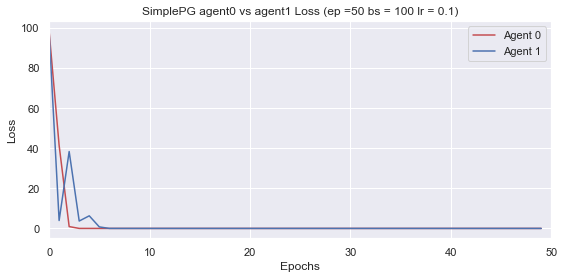

In [44]:
# Plot One
algo = 'SimplePG' # SimplePG or StackPG
epoch = 50 # 50, 100, 500
batch_size = 100 # 100, 500, 1000, 5000
lr = 0.1 # 0.001, 0.01, 0.1
data = 'loss' # returns or loss
fig, ax = plt.subplots() # 2 Algos, 2 Studies (Returns + Losses)
data_plot(fig, ax, algo, epoch, batch_size, lr, data)

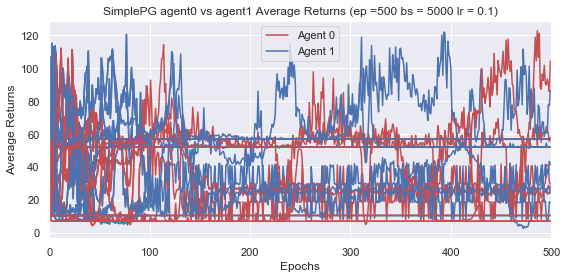

In [45]:
# Plot SimplePG
algo = 'SimplePG'
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]
studies = ['returns']
all_data_plot(algo, epochs, batch_sizes, lrs, studies)

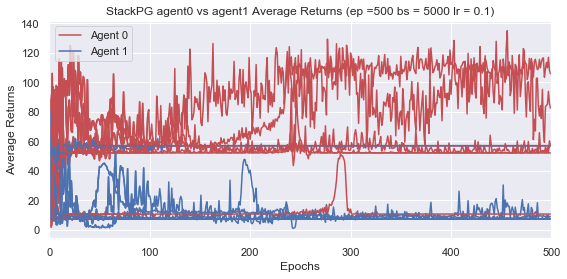

In [46]:
# Plot StackPG
algo = 'StackPG'
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]
studies = ['returns']
all_data_plot(algo, epochs, batch_sizes, lrs, studies)

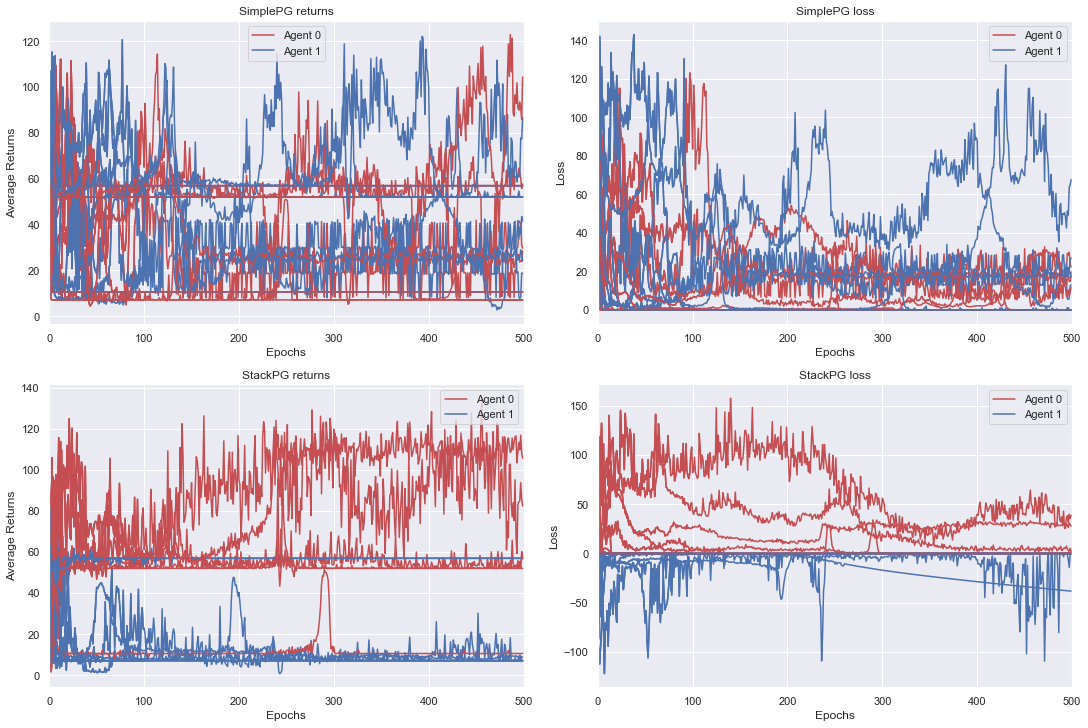

In [52]:
# Plot Map
algos = ['SimplePG', 'StackPG']
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]
studies = ['returns', 'loss']
all_data_map_plot(algos, epochs, batch_sizes, lrs, studies, figsize=[15,10])

### Scoring Function

To improve efficiency: pre-allocate df, use only big score, and calculate the other df after the fact
<br>
To improve flexibility: Extract columns titles and use those titles for DF columns


In [32]:
# Calculates Score in each epoch, returns dataframe of results total, batch, and epoch scores

def score(algos, epochs, batch_sizes, lrs):
    big_score_df = df({'Algo': [], 'Epochs': [], 'Batch Size': [], 'Learning Rate': [], 'Epoch': [], 'Return Difference': []})
    score_df = df({'Algo': [], 'Epochs': [], 'Batch Size': [], 'Learning Rate': [], 'ag0_score': [], 'ag1_score': []})
    batch_df = df({'Algo': [], 'Epochs': [], 'Batch Size': [], 'batch_ag0_score': [], 'batch_ag1_score': []})
    epoch_df = df({'Algo': [], 'Epochs': [], 'epoch_ag0_score': [], 'epoch_ag1_score': []})
    for algo in algos:
        ag0_score = 0
        ag1_score = 0
        count = 0
        for epoch in epochs:
            epoch_count = count
            epoch_ag0_score = ag0_score
            epoch_ag1_score = ag1_score
            for batch in batch_sizes:
                batch_count = count
                batch_ag0_score = ag0_score
                batch_ag1_score = ag1_score
                for lr in lrs:
                    data_df = df_data(algo, epoch, batch, lr)
                    data = data_df[['agent0_avg_rets', 'agent1_avg_rets']]
                    return_data = df.to_numpy(data)
                    trials = len(return_data[:,0])
                    lr_ag0_score = ag0_score
                    lr_ag1_score = ag1_score
                    for idx in np.arange(0,trials):
                        return_diff = 0
                        count += 1
                        if (return_data[idx,0] > return_data[idx,1]):
                            ag0_score += 1
                        else:
                            ag1_score += 1
                        return_diff = return_data[idx,0] - return_data[idx,1]
                        big_score_df.loc[len(big_score_df.index)] = [algo, epoch, batch, lr, idx, return_diff] 
                    lr_ag0_score = (ag0_score - lr_ag0_score) / trials
                    lr_ag1_score = (ag1_score - lr_ag1_score) / trials
                    score_df.loc[len(score_df.index)] = [algo, epoch, batch, lr, lr_ag0_score, lr_ag1_score] 
                batch_ag0_score = (ag0_score - batch_ag0_score) / (count - batch_count)
                batch_ag1_score = (ag1_score - batch_ag1_score) / (count - batch_count)
                batch_df.loc[len(batch_df.index)] = [algo, epoch, batch, batch_ag0_score, batch_ag1_score] 
                # print('Batch Score: algo = '+ algo + ' Batch = ' + str(batch) + ' ag0_score = ' + str(round(batch_ag0_score,5)) +   ' ag1_score = ' + str(round(batch_ag1_score,5)))
            epoch_ag0_score = (ag0_score - epoch_ag0_score) / (count - epoch_count)
            epoch_ag1_score = (ag1_score - epoch_ag1_score) / (count - epoch_count)
            epoch_df.loc[len(epoch_df.index)] = [algo, epoch, epoch_ag0_score, epoch_ag1_score] 
            # print('Epoch Score: algo = '+ algo + ' Epoch = ' + str(epoch) + ' ag0_score = ' + str(round(epoch_ag0_score,5)) +   ' ag1_score = ' + str(round(epoch_ag1_score,5)))
        ag0_score /= count
        ag1_score /= count
        print('    Total Score: algo = '+ algo + ' ag0_score = ' + str(round(ag0_score,5)) +   ' ag1_score = ' + str(round(ag1_score,5)))
    return big_score_df, score_df, batch_df, epoch_df

algos = ['SimplePG', 'StackPG']
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]
big_score_df, score_df, batch_df, epoch_df = score(algos, epochs, batch_sizes, lrs)

big_score_df.to_pickle("C:/Users/drago/OneDrive - UW/Ratliff Research/gridhunter_data/big_score_df.pkl")

    Total Score: algo = SimplePG ag0_score = 0.43385 ag1_score = 0.56615
    Total Score: algo = StackPG ag0_score = 0.82968 ag1_score = 0.17032


In [33]:
# All Raw Data DF
def raw_score_df(algos, epochs, batch_sizes, lrs):
    raw_df = df({'Algo': [], 'Epochs': [], 'Batch Size': [], 'Learning Rate': [], 'Epoch': [],
                 'Return Difference': [], 'agent0_grad_norms': [], 'agent0_gn_rss': [], 'agent0_avg_rets': [],
                 'agent0_avg_lens': [], 'agent0_loss': [], 'agent1_grad_norms': [], 'agent1_gn_rss': [],
                 'agent1_avg_rets': [], 'agent1_avg_lens': [], 'agent1_loss': []})
    for algo in algos:
        for epoch in epochs:
            for batch in batch_sizes:
                for lr in lrs:
                    data = df_data(algo, epoch, batch, lr)
                    for idx in np.arange(0,len(data.index)):
                        ag0_gn = data.at[idx,'agent0_grad_norms']
                        ag0_gn, ag0_gn_rss = grad_norms_to_float(ag0_gn)
                        ag0_ar = data.at[idx,'agent0_avg_rets']
                        ag0_al = data.at[idx,'agent0_avg_lens']
                        ag0_l = data.at[idx,'agent0_loss']
                        ag1_gn = data.at[idx,'agent1_grad_norms']
                        ag1_gn, ag1_gn_rss = grad_norms_to_float(ag1_gn)
                        ag1_ar = data.at[idx,'agent1_avg_rets']
                        ag1_al = data.at[idx,'agent1_avg_lens']
                        ag1_l = data.at[idx,'agent1_loss']
                        return_diff = ag0_ar - ag1_ar
                        raw_df.loc[len(raw_df.index)] = [algo, epoch, batch, lr, idx, return_diff,
                                                               ag0_gn, ag0_gn_rss, ag0_ar, ag0_al, ag0_l,
                                                               ag1_gn, ag1_gn_rss, ag1_ar, ag1_al, ag1_l] 
    return raw_df


algos = ['SimplePG', 'StackPG']
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]
raw_df = raw_score_df(algos, epochs, batch_sizes, lrs)

print(raw_df)
raw_df.to_pickle("C:/Users/drago/OneDrive - UW/Ratliff Research/gridhunter_data/raw_df.pkl")

           Algo  Epochs  Batch Size  Learning Rate  Epoch  Return Difference  \
0      SimplePG    50.0       100.0          0.001    0.0           0.184523   
1      SimplePG    50.0       100.0          0.001    1.0          16.582947   
2      SimplePG    50.0       100.0          0.001    2.0           9.094323   
3      SimplePG    50.0       100.0          0.001    3.0          38.307763   
4      SimplePG    50.0       100.0          0.001    4.0          37.226338   
...         ...     ...         ...            ...    ...                ...   
13543   StackPG   500.0      5000.0          0.100   41.0           0.000000   
13544   StackPG   500.0      5000.0          0.100   42.0           0.000000   
13545   StackPG   500.0      5000.0          0.100   43.0           0.000000   
13546   StackPG   500.0      5000.0          0.100   44.0           0.000000   
13547   StackPG   500.0      5000.0          0.100   45.0           0.000000   

                                       

### Plotting Scores

In [34]:
# Plot Map
algos = ['SimplePG', 'StackPG']
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]
studies = ['returns', 'loss']

### Visualizing Gradient Descent

In [35]:
algos = ['SimplePG', 'StackPG']
epochs = [50, 100, 500]
batch_sizes = [100, 500, 1000, 5000]
lrs = [0.001, 0.01, 0.1]

data_GD = df_data(algos[0], epochs[0], batch_sizes[0], lrs[0])
data_GD = df.to_numpy(data_GD)
data_GD = data_GD[:,0]

#for i in np.arange(0,len(data_GD)):
grad_array = data_GD[0]
grad_array2, rsm = (grad_norms_to_float(grad_array))


print('Root-Sum-Square Value = ', rsm)
print(grad_array)

Root-Sum-Square Value =  2.9931109803207328
[0.220085009932518, 0.20015941560268402, 1.8588873147964478, 0.390306293964386, 1.239396095275879, 0.7030672430992126, 1.1316899061203003, 1.396883249282837]


In [36]:
cols = ['Algo', 'Epochs', 'Batch Size', 'Learning Rate']
df1 = raw_df.groupby(cols).max().sort_values('agent0_avg_rets',ascending=False)
df1

Epoch  Return Difference  \
Algo     Epochs Batch Size Learning Rate                             
StackPG  500.0  500.0      0.001          499.0         119.298452   
         100.0  500.0      0.010           99.0          75.786850   
         500.0  500.0      0.010          133.0          75.786850   
         50.0   500.0      0.010           49.0          75.786850   
         500.0  5000.0     0.001          499.0         113.901497   
...                                         ...                ...   
         100.0  5000.0     0.100           45.0          43.378776   
         50.0   5000.0     0.100           45.0          43.378776   
SimplePG 500.0  5000.0     0.100          499.0         -17.527230   
         100.0  5000.0     0.100           99.0         -17.527230   
         50.0   5000.0     0.100           49.0         -17.527230   

                                                                          agent0_grad_norms  \
Algo     Epochs Batch Size Learning Rate                                                      
StackPG  500.0  500.0      0.001          [27.4522762298584, 20.345853805541992, 147.945...   
         100.0  500.0      0.010          [0.42610183358192444, 0.28112590312957764, 2.1...   
         500.0  500.0      0.010          [0.42610183358192444, 0.28112590312957764, 2.1...   
         50.0   500.0      0.010          [0.42610183358192444, 0.28112590312957764, 2.1...   
         500.0  5000.0     0.001          [1.3230206966400146, 1.0050909519195557, 3.519...   
...                                                                                     ...   
         100.0  5000.0     0.100                   [nan, nan, nan, nan, nan, nan, nan, nan]   
         50.0   5000.0     0.100                   [nan, nan, nan, nan, nan, nan, nan, nan]   
SimplePG 500.0  5000.0     0.100          [0.08057655394077301, 0.06208339333534241, 0.6...   
         100.0  5000.0     0.100          [0.08057655394077301, 0.06208339333534241, 0.6...   
         50.0   5000.0     0.100          [0.08057655394077301, 0.06208339333534241, 0.6...   

                                          agent0_gn_rss  agent0_avg_rets  \
Algo     Epochs Batch Size Learning Rate                                   
StackPG  500.0  500.0      0.001             156.201608       134.944735   
         100.0  500.0      0.010              19.890707       124.882435   
         500.0  500.0      0.010              19.890707       124.882435   
         50.0   500.0      0.010              19.890707       124.882435   
         500.0  5000.0     0.001             120.139782       123.656331   
...                                                 ...              ...   
         100.0  5000.0     0.100               4.935289        50.449843   
         50.0   5000.0     0.100               4.935289        50.449843   
SimplePG 500.0  5000.0     0.100               0.962390        48.274422   
         100.0  5000.0     0.100               0.962390        48.274422   
         50.0   5000.0     0.100               0.962390        48.274422   

                                          agent0_avg_lens  agent0_loss  \
Algo     Epochs Batch Size Learning Rate                                 
StackPG  500.0  500.0      0.001                    500.0   157.776413   
         100.0  500.0      0.010                    500.0   108.088730   
         500.0  500.0      0.010                    500.0   108.088730   
         50.0   500.0      0.010                    500.0   108.088730   
         500.0  5000.0     0.001                    500.0    85.835594   
...                                                   ...          ...   
         100.0  5000.0     0.100                    500.0    67.007332   
         50.0   5000.0     0.100                    500.0    67.007332   
SimplePG 500.0  5000.0     0.100                    500.0    67.007332   
         100.0  5000.0     0.100                    500.0    67.007332   
         50.0   50

In [37]:
# Interactive Plots